In [ ]:
!unzip road_signs.zip 


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [5]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [6]:
train_dataset = train.flow_from_directory('road_signs/datasets/train/',target_size=(200,200),batch_size=3,class_mode='categorical')
validation_dataset = train.flow_from_directory('road_signs/datasets/validation/',target_size=(200,200),batch_size=3,class_mode='categorical')

Found 30 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [7]:
train_dataset.class_indices

{'fifty': 0, 'no_parking': 1, 'stop': 2}

MODEL DESIGNING


In [8]:
from keras.models import Sequential
from keras.layers import Conv2D  # help in convultion img
from keras.layers import MaxPooling2D, Flatten, Dense # dense layers are hidden layers

In [19]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)))   # 16 feature detectors , ech feature detector will be 5,5 size
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu'))   # 32 feature detectors , ech feature detector will be 5,5 size
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(5,5),activation='relu'))   # 64 feature detectors , ech feature detector will be 5,5 size
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(240,activation = 'relu'))  # 512 neuron in hidden layer

model.add(Dense(3,activation='softmax'))  # output layer. return 0 or 1 or 2 

In [20]:
model.compile(loss='categorical_crossentropy',optimizer= 'adam',metrics=['accuracy'])

In [22]:
model_fit = model.fit(train_dataset,epochs=15,steps_per_epoch=10,validation_data=validation_dataset, validation_steps =10,verbose=1)

Epoch 1/15
10/10 [==============================] - 3s 295ms/step - loss: 0.9659 - accuracy: 0.6000 - val_loss: 0.7866 - val_accuracy: 0.8000
Epoch 2/15
10/10 [==============================] - 3s 308ms/step - loss: 0.5047 - accuracy: 0.9333 - val_loss: 0.2903 - val_accuracy: 0.9000
Epoch 3/15
10/10 [==============================] - 3s 305ms/step - loss: 0.3781 - accuracy: 0.8333 - val_loss: 0.1546 - val_accuracy: 0.9333
Epoch 4/15
10/10 [==============================] - 3s 292ms/step - loss: 0.2358 - accuracy: 0.9000 - val_loss: 0.0448 - val_accuracy: 1.0000
Epoch 5/15
10/10 [==============================] - 3s 291ms/step - loss: 0.0954 - accuracy: 0.9667 - val_loss: 0.0805 - val_accuracy: 1.0000
Epoch 6/15
10/10 [==============================] - 3s 291ms/step - loss: 0.0199 - accuracy: 1.0000 - val_loss: 0.0170 - val_accuracy: 1.0000
Epoch 7/15
10/10 [==============================] - 3s 294ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 

In [23]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

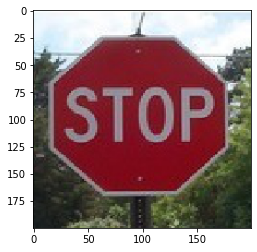

In [33]:
img = load_img('testing.jpg',target_size=(200,200))
plt.imshow(img)
plt.show()
XX = img_to_array(img)
XX = np.expand_dims(XX,axis=0)
images = np.vstack([XX])
val = model.predict(XX)

RECOGNIZING IMAGES 


In [34]:
if(val[0][0]==1):
  print("50 limit sign")
elif val[0][1] == 1:
  print("No parking sign detected")
elif val[0][2] == 1:
  print("STOP sign detected")


STOP sign detected


In [35]:
val

array([[0., 0., 1.]], dtype=float32)